## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [97]:
import pandas as pd

import seaborn as sns

import graphviz

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz

boston = pd.read_csv(r'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')


In [98]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [99]:
#Dividindo a variável target
X = boston.drop(columns = 'medv' , axis = 1)
y = boston.medv

In [100]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [101]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [102]:
#Separadando a base em treino e test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size  = 0.3 , random_state = 100) 

In [103]:
#Criando duas árvores com profundidades diferentes
clf1 = DecisionTreeRegressor(max_depth = 2)
clf2 = DecisionTreeRegressor(max_depth = 8)

In [104]:
#Treinando base 1
clf1.fit(X_train , y_train)
#Treinando base 2
clf2.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=8)

In [105]:
#Calculando R quadrático de cada árvore
rquad1 = clf1.score(X_train , y_train)
rquad2 = clf2.score(X_train , y_train)

print('O R quadrático da árvore de profundidade 2 é {:.2f}'.format(rquad1).replace('.',','))
print('O R quadrático da árvore de profundidade 8 é {:.2f}'.format(rquad2).replace('.',','))

if rquad1 > rquad2:
    print('\nA árvore com profundidade 2 é mais indicada')
else:
    print('\nA árvore com produndidade 8 é mais indicada')

O R quadrático da árvore de profundidade 2 é 0,73
O R quadrático da árvore de profundidade 8 é 0,98

A árvore com produndidade 8 é mais indicada


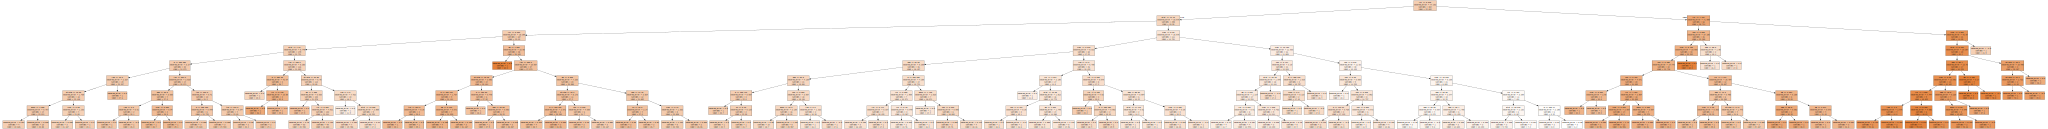

In [106]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                                feature_names=X.columns,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [107]:
#Realizando pré-poda
regr1 = DecisionTreeRegressor(max_depth = 4 , min_samples_leaf = 7)
regr1.fit(X_train , y_train)

rquad = regr1.score(X_test , y_test)
rquad

0.6813165213338255

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [108]:
#Calculando o custo de complexidade
path = regr1.cost_complexity_pruning_path(X_train , y_train)
path

{'ccp_alphas': array([ 0.        ,  0.19498542,  0.38703923,  0.42398519,  0.55899334,
         0.66196779,  0.84204389,  0.88482141,  0.95950068,  2.23010627,
         3.54914283,  5.1641668 , 13.4547042 , 37.42402445]),
 'impurities': array([10.42637783, 10.62136325, 11.00840248, 11.43238767, 11.991381  ,
        12.65334879, 13.49539268, 14.38021408, 15.33971476, 17.56982103,
        21.11896385, 26.28313065, 39.73783485, 77.1618593 ])}

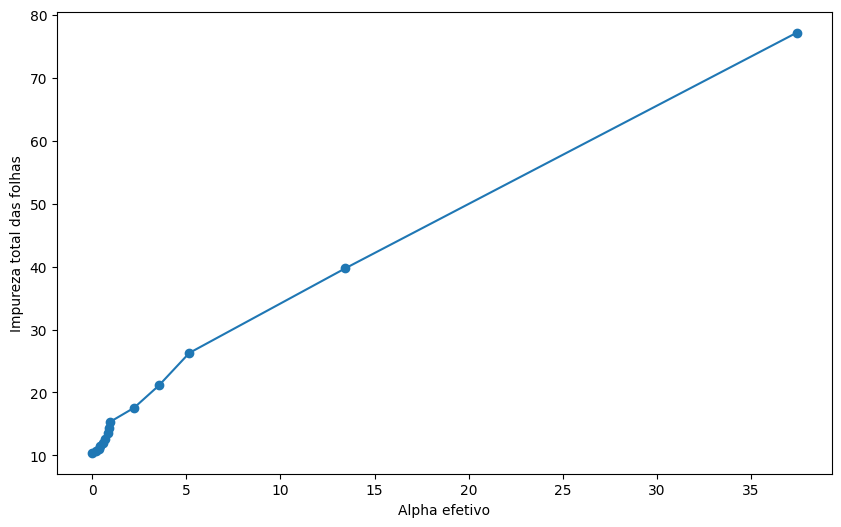

In [109]:
#Armazenando cada ccp_alpha e suas impurezas

ccp_alphas , impurities = path.ccp_alphas , path.impurities

#Plotando gráfico da relação entre o ccp_alpha e sua impureza correspondente

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities , marker = 'o')
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

plt.show()

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [110]:
#Calculando o ccp_alpha de cada árvore de regressão
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state= 100 , ccp_alpha = ccp_alpha)
    clf.fit(X_train , y_train) 
    clfs.append(clf)
clfs

[DecisionTreeRegressor(random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.19498542467833446, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.3870392251816346, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.4239851872952236, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.5589933352900069, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.6619677866790301, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.8420438877402392, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.8848214061518257, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.959500675222972, random_state=100),
 DecisionTreeRegressor(ccp_alpha=2.2301062697790783, random_state=100),
 DecisionTreeRegressor(ccp_alpha=3.54914282616944, random_state=100),
 DecisionTreeRegressor(ccp_alpha=5.164166801183792, random_state=100),
 DecisionTreeRegressor(ccp_alpha=13.454704198686596, random_state=100),
 DecisionTreeRegressor(ccp_alpha=37.42402444694582, random_state=100)]

In [111]:
trees_depths = [clf.tree_.max_depth for clf in clfs] #Armazenando árvores com profudidade máxima
trees_depths

[23, 6, 6, 5, 4, 4, 4, 4, 4, 3, 2, 2, 2, 0]

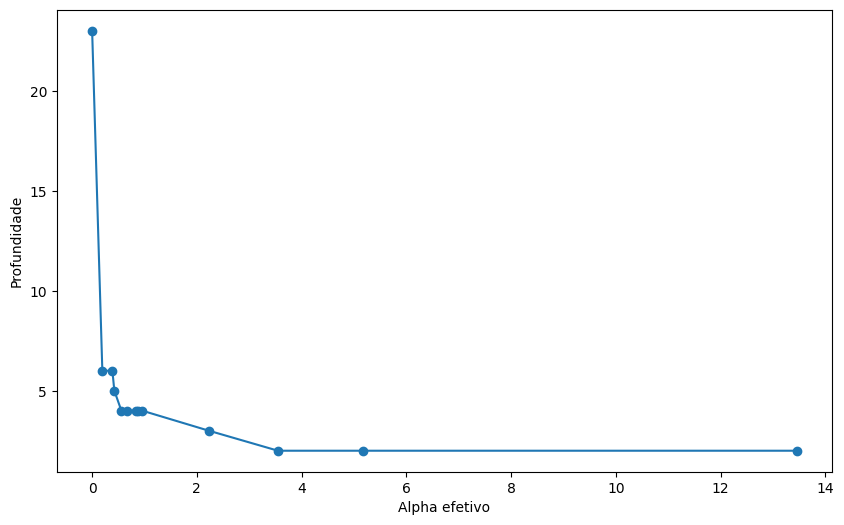

In [117]:
plt.figure(figsize = (10, 6))
plt.plot(ccp_alphas[:-1] , trees_depths[:-1] , marker = 'o')
plt.xlabel('Alpha efetivo')
plt.ylabel('Profundidade')

plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [113]:
mse_trees = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
mse_trees

[0.0,
 5.081066095025288,
 6.336057889483184,
 7.111129129730696,
 9.503893059542166,
 9.503893059542166,
 10.983029594081218,
 10.983029594081218,
 10.983029594081218,
 15.339714756925167,
 21.11896385287412,
 21.11896385287412,
 26.28313065405787,
 77.16185929969038]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

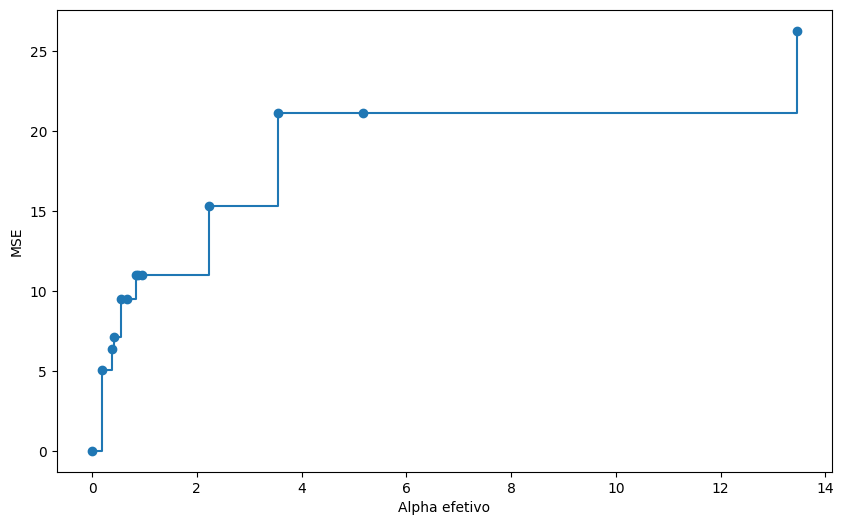

In [114]:
plt.figure(figsize = (10 ,6))

plt.plot(ccp_alphas[:-1] , mse_trees[:-1] , marker = 'o' , drawstyle="steps-post")

plt.xlabel('Alpha efetivo')
plt.ylabel('MSE')

plt.show()

O MSE mínimo e portanto de melhor ajuste é no valor de 5.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [124]:
clfs[1].score(X_train , y_train)

0.9341505487148665

### 7. Visualize esta árvore.

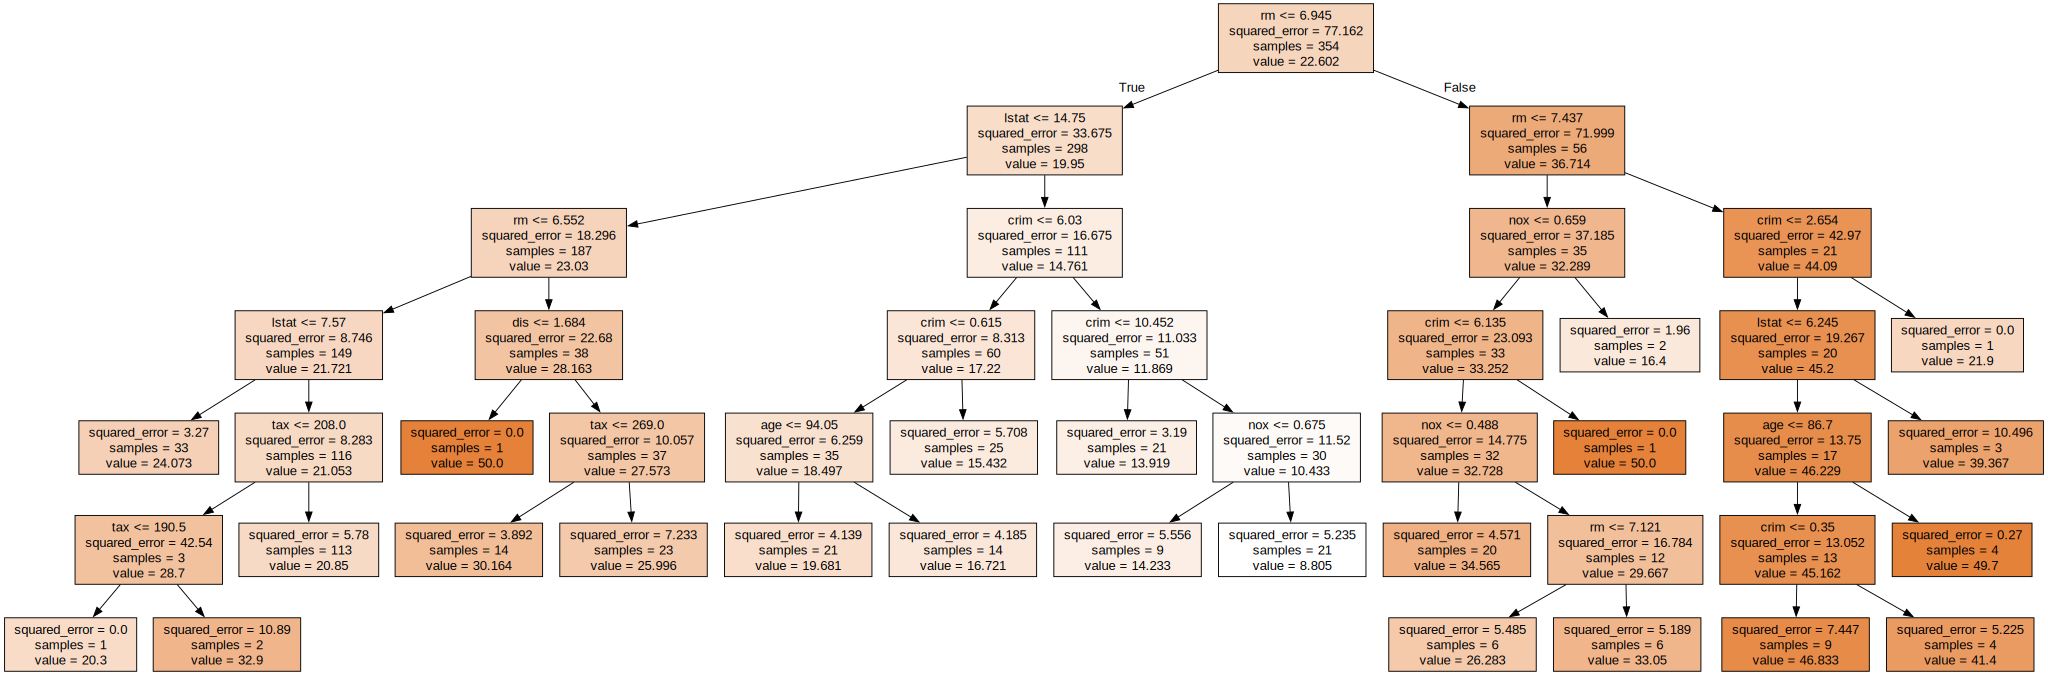

In [130]:
dot_data = tree.export_graphviz(clfs[1], out_file=None, 
                                feature_names=X.columns,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph